# https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2

## Anomaly detection with Local Outlier Factor (LOF)

What is the Local Outlier Factor (LOF)?
LOF is an unsupervised (well, semi-supervised) machine learning algorithm that uses the density of data points in the distribution as a key factor to detect outliers.

LOF compares the density of any given data point to the density of its neighbors. Since outliers come from low-density areas, the ratio will be higher for anomalous data points. As a rule of thumb, a normal data point has a LOF between 1 and 1.5 whereas anomalous observations will have much higher LOF. The higher the LOF the more likely it is an outlier. If the LOF of point X is 5, it means the average density of X’s neighbors is 5 times higher than its local density.

In mathematical terms,

LOF(X)=[(LRD(1st neighbor) + LRD(2nd neighbor ) + .................+ LRD(kth neighbor))/LRD(X)]/k
where LRD is Local Reachability Distance and is computed as follows.

LRD(X) = 1/(sum of Reachability Distance (X, n))/k)
where n is neighbors upto k
The algorithm has four different components:

Hyperparameter k: determines the number of neighbors
Reachability distance: distances measured using 3 methods — Euclid, Minkowski, Manhattan
Local reachability distance: (LRD) (X) = 1/(sum of Reachability Distance (X, n))/k), where n is neighbors upto k
Local Outlier Factor (LOF)
Enough of theory and mathematics. If you didn’t understand much of it, no hard feelings. As I use to say, to drive a car we don’t need to know about its mechanics, but we do need to know how to drive! So jump right into the next section on the implementation of LOF in Python.

In [1]:
# data preparation
import pandas as pd
import numpy as np
# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# data
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])

In [3]:
print (df)

   x  y
0  0  1
1  1  1
2  1  2
3  2  2
4  5  6


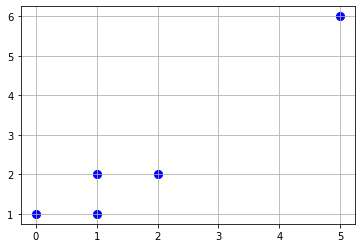

In [4]:
# plot data points
plt.scatter(df["x"], df["y"], color = "b", s = 65)
plt.grid()

In [8]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(df)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers and positives inliers


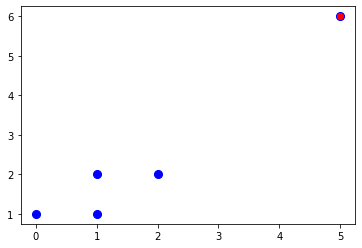

In [9]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
# plot data
plt.scatter(df["x"], df["y"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["x"], outlier_values["y"], color = "r")
